In [1]:
#Run this command before importing the dataset.
!pip install ucimlrepo

#### Load the dataset from the repository https://archive.ics.uci.edu/dataset/2/adult (4 marks)

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets


In [3]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [5]:
X.shape, y.shape

((48842, 14), (48842, 1))

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [7]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
X.isna().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [9]:
y.isna().sum()

,0
income,0


In [10]:
for cat in X.select_dtypes(include='object'):
  print(cat, len(X[cat].unique()), X[cat].unique())

workclass 10 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
education 16 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status 7 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation 16 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
relationship 6 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race 5 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex 2 ['Male' 'Female']
native-country 43 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'H

In [11]:
y.value_counts()

,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


In [12]:
y = y.income.str.replace('<=50K.', '<=50K')
y = y.str.replace('>50K.', '>50K')
y.value_counts()

,count
income,
<=50K,37155
>50K,11687


#### Split the dataset into Train and Test Dataset in 80:20 ratio (1 marks)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [14]:
for cat in X_train.select_dtypes(include='object'):
  print(cat, len(X_train[cat].unique()), X_train[cat].unique())
  print(len(X_test[cat].unique()), X_test[cat].unique())

workclass 10 ['?' 'Self-emp-not-inc' 'Private' 'Self-emp-inc' 'Federal-gov' 'Local-gov'
 'State-gov' nan 'Never-worked' 'Without-pay']
10 ['Self-emp-not-inc' 'Self-emp-inc' 'Private' 'State-gov' 'Local-gov'
 'Federal-gov' '?' nan 'Without-pay' 'Never-worked']
education 16 ['5th-6th' 'Assoc-voc' 'Assoc-acdm' 'HS-grad' 'Some-college' '9th'
 'Bachelors' 'Doctorate' '7th-8th' 'Masters' '12th' '10th' '11th'
 'Prof-school' '1st-4th' 'Preschool']
16 ['Masters' 'Some-college' 'Assoc-voc' '11th' '9th' '12th' 'HS-grad'
 'Assoc-acdm' '10th' 'Prof-school' '7th-8th' 'Bachelors' 'Doctorate'
 'Preschool' '1st-4th' '5th-6th']
marital-status 7 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Widowed'
 'Married-spouse-absent' 'Separated' 'Married-AF-spouse']
7 ['Married-civ-spouse' 'Never-married' 'Divorced' 'Separated' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation 16 ['?' 'Farming-fishing' 'Craft-repair' 'Tech-support' 'Sales'
 'Adm-clerical' 'Exec-managerial' 'Other-service' 'Pro

In [15]:
X_train.shape, X_test.shape

((39073, 14), (9769, 14))

#### Create a data pipeline that does:
#### 1. Imputation (5 marks)
#### 2. Standardization and Scaling (5 marks)
#### 3. Discretization (5 marks)
#### 4. Encoding (5 marks)
#### 5. Prediction (5 marks)

#### (Total 25 marks)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
age_transformer = Pipeline([
    ('scaler', StandardScaler())
])

workclass_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

fnlwgt_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

education_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

education_num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

marital_status_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

occupation_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

relationship_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

race_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

sex_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])

capital_gain_transformer = Pipeline([
    ('scaler', StandardScaler())
])

capital_loss_transformer = Pipeline([
    ('scaler', StandardScaler())
])

hours_per_week_transformer = Pipeline([
    ('scaler', StandardScaler())
])

native_country_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('age_transformer', age_transformer, ['age']),
        ('workclass_transformer', workclass_transformer, ['workclass']),
        ('fnlwgt_transformer', fnlwgt_transformer, ['fnlwgt']),
        ('education_transformer', education_transformer, ['education']),
        ('education_num_transformer', education_num_transformer, ['education-num']),
        ('marital_status_transformer', marital_status_transformer, ['marital-status']),
        ('occupation_transformer', occupation_transformer, ['occupation']),
        ('relationship_transformer', relationship_transformer, ['relationship']),
        ('race_transformer', race_transformer, ['race']),
        ('sex_transformer', sex_transformer, ['sex']),
        ('capital_gain_transformer', capital_gain_transformer, ['capital-gain']),
        ('capital_loss_transformer', capital_loss_transformer, ['capital-loss']),
        ('hours_per_week_transformer', hours_per_week_transformer, ['hours-per-week']),
        ('native_country_transformer', native_country_transformer, ['native-country']),
    ],remainder='passthrough',)


In [18]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train, y_test

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]))

In [19]:
#capture all categories
preprocessor.fit(X)

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=500)],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20]
    }
]

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy_score(y_test, y_pred), best_model

(0.8663118026410073,
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('age_transformer',
                                                   Pipeline(steps=[('scaler',
                                                                    StandardScaler())]),
                                                   ['age']),
                                                  ('workclass_transformer',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('encoder',
                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                   ['workclass']),
                                                  ('fnlwgt_trans

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.78      0.60      0.68      2290

    accuracy                           0.87      9769
   macro avg       0.83      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769

[[7088  391]
 [ 915 1375]]


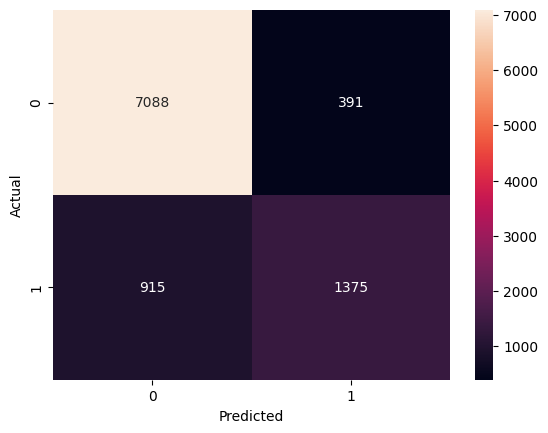

In [20]:
print(classification_report(y_test, y_pred))
# print("Accuracy: ", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()